## **`Problem Statement`**

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.


In [1884]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')


In [1885]:
# import pandas as pd

# # Assuming 'df' is your DataFrame
# housing.to_csv('housing1.csv', index=False)


In [1886]:
# Importing Housing.csv

housing =pd.read_csv("housing1.csv")

In [1887]:
# Looking at the first five rows


housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1888]:
# What type of values are stored in the columns?


housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             544 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         541 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   544 non-null    object 
 9   airconditioning   543 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [1889]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [1890]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.440000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.764683e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.871550e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


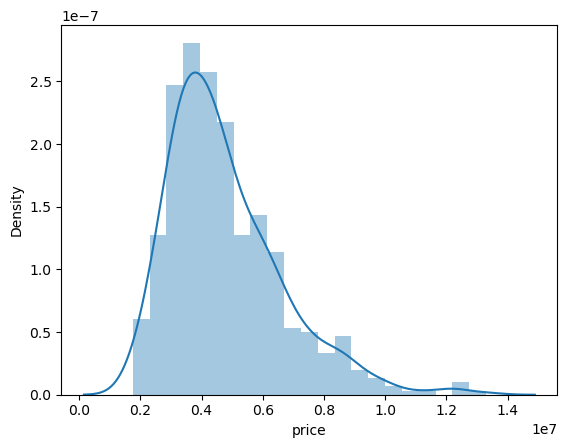

In [1891]:
# Plotting the price terms as dist plot to understand the distribution.
fig = plt.figure()

sns.distplot(housing['price'])
plt.show()


approx normaly distributed

<Axes: ylabel='furnishingstatus'>

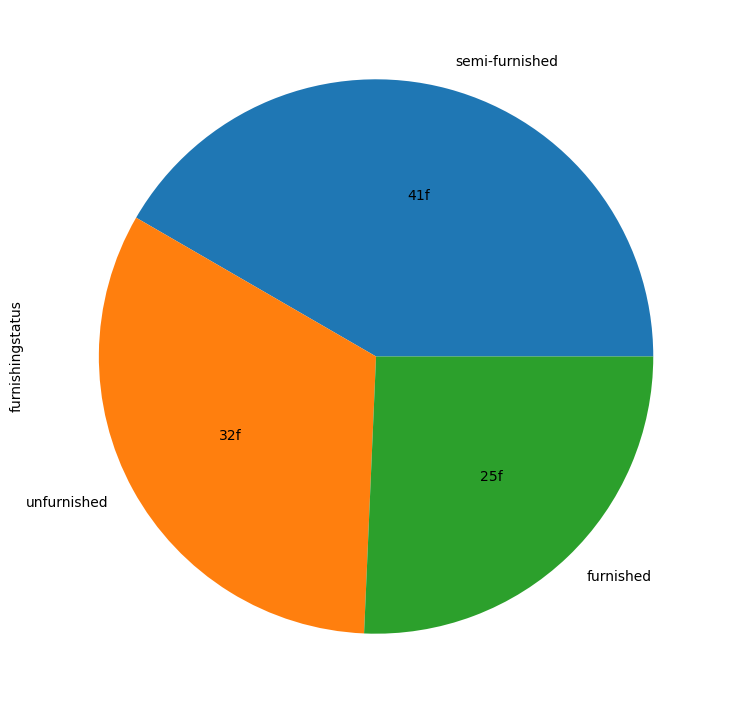

In [1892]:
# catagorical plots

housing['furnishingstatus'].value_counts().plot.pie(y=housing['furnishingstatus'],figsize=(10,9),autopct = "%1.if")

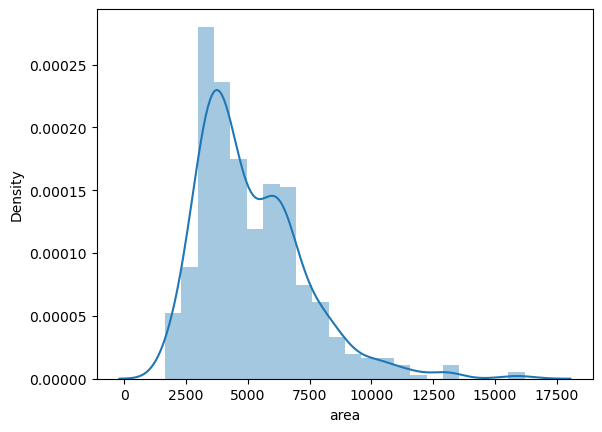

In [1893]:
# Plotting the area terms as dist plot to understand the distribution.
fig = plt.figure()

sns.distplot(housing['area'])
plt.show()


In [1894]:
# check dublicate rows 

housing.duplicated().sum()

0

In [1895]:
# cheack the number of unique values

housing.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

<Axes: ylabel='area'>

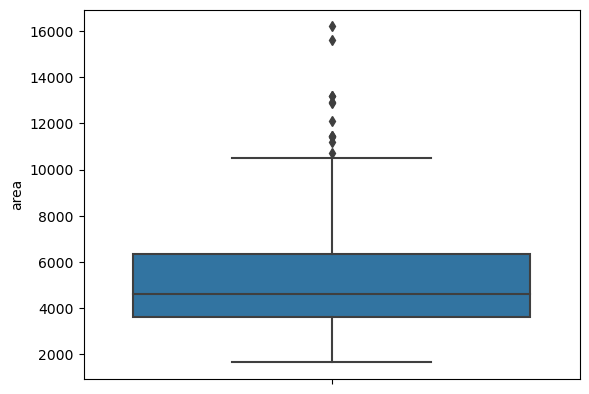

In [1896]:
# outliers in area data

sns.boxplot(data=housing,y='area')

In [1897]:
print(f"meain = {housing.area.mean().round(2)}",f"meadina ={housing.area.median()}")

meain = 5150.54 meadina =4600.0


In [1898]:
Q1 = housing['area'].quantile(0.25)
Q3 = housing['area'].quantile(0.75)
IQR = Q3 - Q1             # interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_a = housing[(housing['area'] < lower_bound) | (housing['area'] > upper_bound)]


In [1899]:
len(outliers)

12

In [1900]:
len(housing.price)

545

<Axes: ylabel='price'>

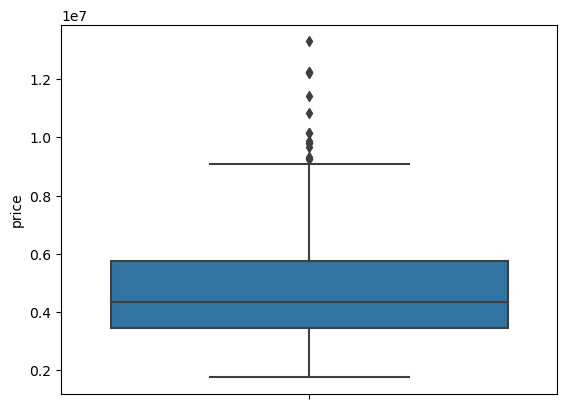

In [1901]:
# outliers in price data

sns.boxplot(data=housing,y='price')

In [1902]:
Q1 = housing['price'].quantile(0.25)
Q3 = housing['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_p = housing[(housing['price'] < lower_bound) | (housing['price'] > upper_bound)]

In [1903]:
len(outliers_p)

15

In [1904]:
print(f"mean = {housing.price.mean().round(2)}",f"meadian ={housing.price.median()}")

mean = 4764682.79 meadian =4340000.0


In [1905]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Missing Values

In [1906]:
housing.isnull().sum()

price               1
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           4
basement            0
hotwaterheating     1
airconditioning     2
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1907]:
# there are some missing values in feature price, guestroom , hotwaterheating

<Axes: >

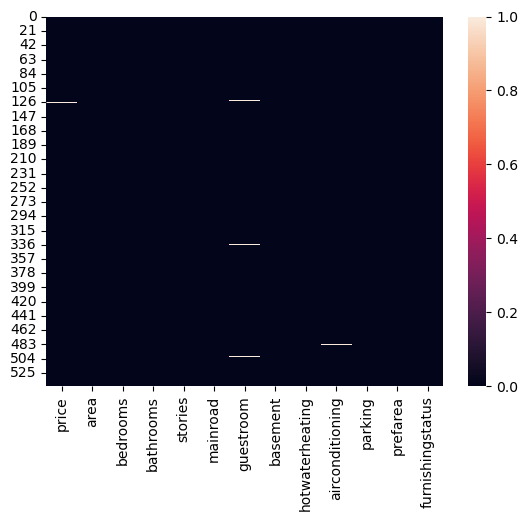

In [1908]:
sns.heatmap(housing.isnull())
# Missing values on index

In [1909]:
housing[123:127]  # price having NaN at 126 index

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
123,5950000.0,7320,4,2,2,yes,NaN,no,no,no,0,no,furnished
124,5950000.0,6525,3,2,4,yes,no,no,no,no,1,no,furnished
125,5943000.0,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
126,NaN,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished


<Axes: xlabel='price', ylabel='Density'>

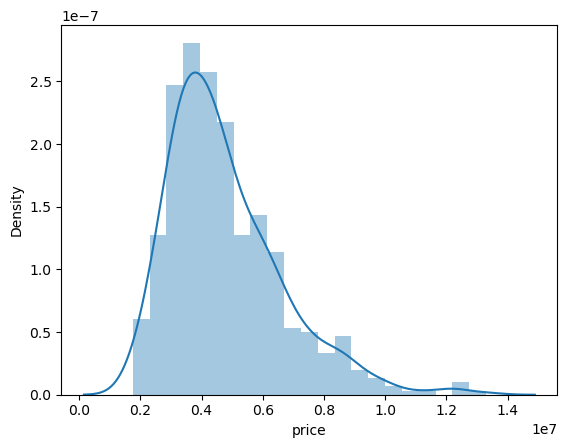

In [1910]:
sns.distplot(housing["price"])

###### price's distribution is right skewed 
> so we will not use mean to replace NaN

<Axes: >

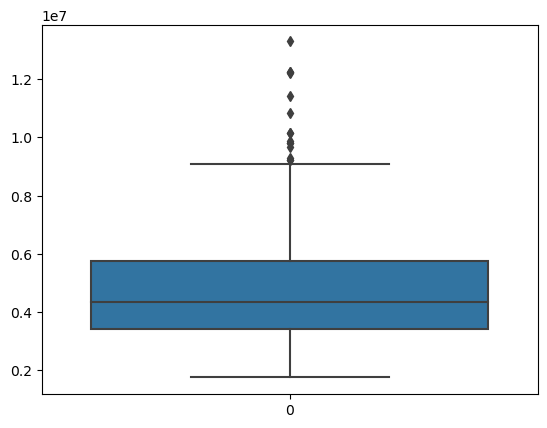

In [1911]:
# fill missing values of price 
# check outliers are present or not

sns.boxplot(housing["price"])

In [1912]:
# it having some outliers so we will fill our NaN  by mediean of price

median=np.median(housing['price'].fillna(0))

In [1913]:
housing['price'] = housing['price'].fillna(median)

In [1914]:
# guestroom having categorical values so we will replace our missing values mode

mode = housing.guestroom.mode()[0]

In [1915]:
housing.guestroom = housing["guestroom"].fillna(mode)

In [1916]:
# hotwaterheating having categorical values so we will replace our missing values mode

mode = housing.hotwaterheating.mode()[0]

In [1917]:
housing.hotwaterheating = housing["hotwaterheating"].fillna(mode)

In [1918]:
mode = housing.airconditioning.mode()[0]
housing.airconditioning = housing["airconditioning"].fillna(mode)

In [1919]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Data Preparation


<p style='text-align: right;'> 12 points</p>

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [1920]:
# Converting Yes to 1 and No to 0 using map function

housing['mainroad'] = housing.mainroad.map({'yes':1,'no':0})
housing['guestroom'] = housing.guestroom.map({'yes':1,'no':0})
housing['basement'] = housing.basement.map({'yes':1,'no':0})
housing['hotwaterheating'] = housing.hotwaterheating.map({'yes':1,'no':0})
housing['airconditioning'] = housing.airconditioning.map({'yes':1,'no':0})
housing['prefarea'] = housing.prefarea.map({'yes':1,'no':0})

In [1921]:
# Now let's see the head

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000.0,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000.0,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000.0,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000.0,7420,4,1,2,1,1,1,0,1,2,0,furnished


The variable 'furnishingstatus' had three levels. We need to convert it to integer.

In [1922]:
# Creating a dummy variable for 'furnishingstatus' or you can say we want to do one-hot encoding on it.
status = pd.get_dummies(housing.furnishingstatus)

In [1923]:
# The result has created three variables that are not needed.

status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [1924]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status dataframe.
status = pd.get_dummies(housing.furnishingstatus,drop_first=True)

In [1925]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [1926]:
#Adding the results to the master dataframe i.e housing
housing = pd.concat((housing,status),axis=1)


In [1927]:
# Dropping furnishingstatus from housing data as we have created the dummies for it
housing.drop('furnishingstatus',axis=1,inplace=True)


In [1928]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000.0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000.0,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000.0,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000.0,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000.0,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [1929]:
# Let us create the new metric and assign it to "areaperbedroom". As name suggested you need to calculate area per bedroom
housing['areaperbedroom'] = housing.area/housing.bedrooms


In [1930]:
# Create another new Metric:bathrooms per bedroom
housing['bbratio'] = housing.bathrooms/housing.bedrooms

In [1931]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000.0,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.000000,0.500000
1,12250000.0,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.000000,1.000000
2,12250000.0,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.000000,0.666667
3,12215000.0,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.000000,0.500000
4,11410000.0,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,1,0,1,0,0,2,0,0,1,1500.000000,0.500000
541,1767150.0,2400,3,1,1,0,0,0,0,0,0,0,1,0,800.000000,0.333333
542,1750000.0,3620,2,1,1,1,0,0,0,0,0,0,0,1,1810.000000,0.500000
543,1750000.0,2910,3,1,1,0,0,0,0,0,0,0,0,0,970.000000,0.333333


<Axes: xlabel='areaperbedroom', ylabel='Density'>

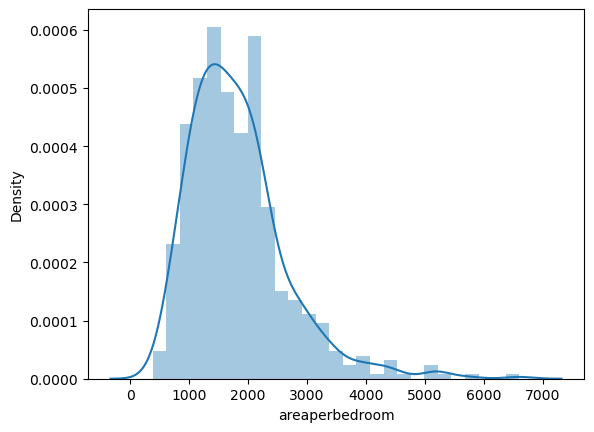

In [1932]:
# distribution of area peer bedroom

sns.distplot(housing.areaperbedroom)

### Rescaling the Features 

In [1933]:
#defining a normalisation function 
#formula=(x-min(x))/(max(x) - min(x))
def normalize (x): 
    # code here
    return((x-np.min(x))/(max(x)-min(x)))

                                            

housing=housing.apply(normalize)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


<Axes: xlabel='area', ylabel='Density'>

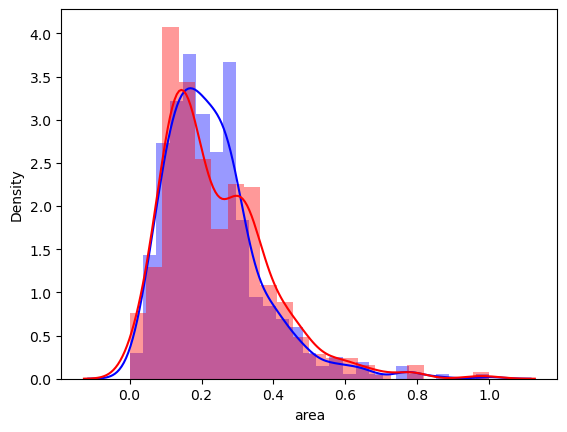

In [1934]:
sns.distplot(housing.areaperbedroom,color = 'b')
sns.distplot(housing.area,color='r')

## Splitting Data into Training and Testing Sets

In [1935]:
# print all housing columns available to decide which all variables will be our feature and target variable

housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [1936]:
# Putting feature variable to X
x = housing.drop('price',axis=1)


# Putting response variable to y ie. price
y = housing['price']

In [1937]:
# import test_train_split module
from sklearn.model_selection import train_test_split


# test and train split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [1938]:
x_train.shape,x_test.shape

((436, 15), (109, 15))

## Building a linear model 1

In [1939]:
# ordinality least square model
# Importing statsmodels module as sm
import statsmodels.api as sm
          

# Adding a constant column to our X_train dataframe
x_train = sm.add_constant(x_train)
    

# create a first fitted model
lm_1 = sm.OLS(y_train,x_train).fit()


In [1940]:
lm_1

In [1941]:
#Let's see the summary of our first linear model

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     61.22
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.33e-95
Time:                        07:40:58   Log-Likelihood:                 435.41
No. Observations:                 436   AIC:                            -838.8
Df Residuals:                     420   BIC:                            -773.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0619      0.057      1.096      0.274      -0.049       0.173
area                0.5020      0.115      4.365      0.000       0.276       0.728
bedrooms           -0.0392      0.088     -0.443      0.658      -0.213       0.135
bathrooms           0.1640      0.118      1.386      0.167      -0.069       0.397
stories             0.1255      0.019      6.717      0.000       0.089       0.162
mainroad            0.0252      0.013      1.880      0.061      -0.001       0.052
guestroom           0.0252      0.013      1.998      0.046       0.000       0.050
basement            0.0434      0.011      4.006      0.000       0.022       0.065
hotwaterheating     0.0109      0.026      0.417      0.677      -0.040       0.062
airconditioning     0.0788      0.010      7.637      0.000       0.059       0.099
parking             0.0590      0.017      3.537      0.000       0.026       0.092
prefarea            0.0456      0.011      4.154      0.000       0.024       0.067
semi-furnished     -0.0085      0.011     -0.767      0.444      -0.030       0.013
unfurnished        -0.0381      0.012     -3.184      0.002      -0.062      -0.015
areaperbedroom     -0.2236      0.134     -1.664      0.097      -0.488       0.041
bbratio             0.0539      0.102      0.530      0.596      -0.146       0.254
==============================================================================
Omnibus:                      108.382   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.130
Skew:                           1.103   Prob(JB):                     2.57e-81
Kurtosis:                       6.945   Cond. No.                         80.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1942]:
# # import test_train_split module
# from sklearn.model_selection import train_test_split


# # test and train split
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


## 2nd Model

In [1943]:
# #ordinality least square model
# # Importing statsmodels module as sm
# import statsmodels.api as sm
          

# # Adding a constant column to our X_train dataframe
# x_train = sm.add_constant(x_train)
    

# # create a first fitted model
# lm_2 = sm.OLS(y_train,x_train).fit()


In [1944]:
# lm_2.summary()

# Assumptions of Linear Regression

### 1. Linear Relationship Between input(features) and output(response)

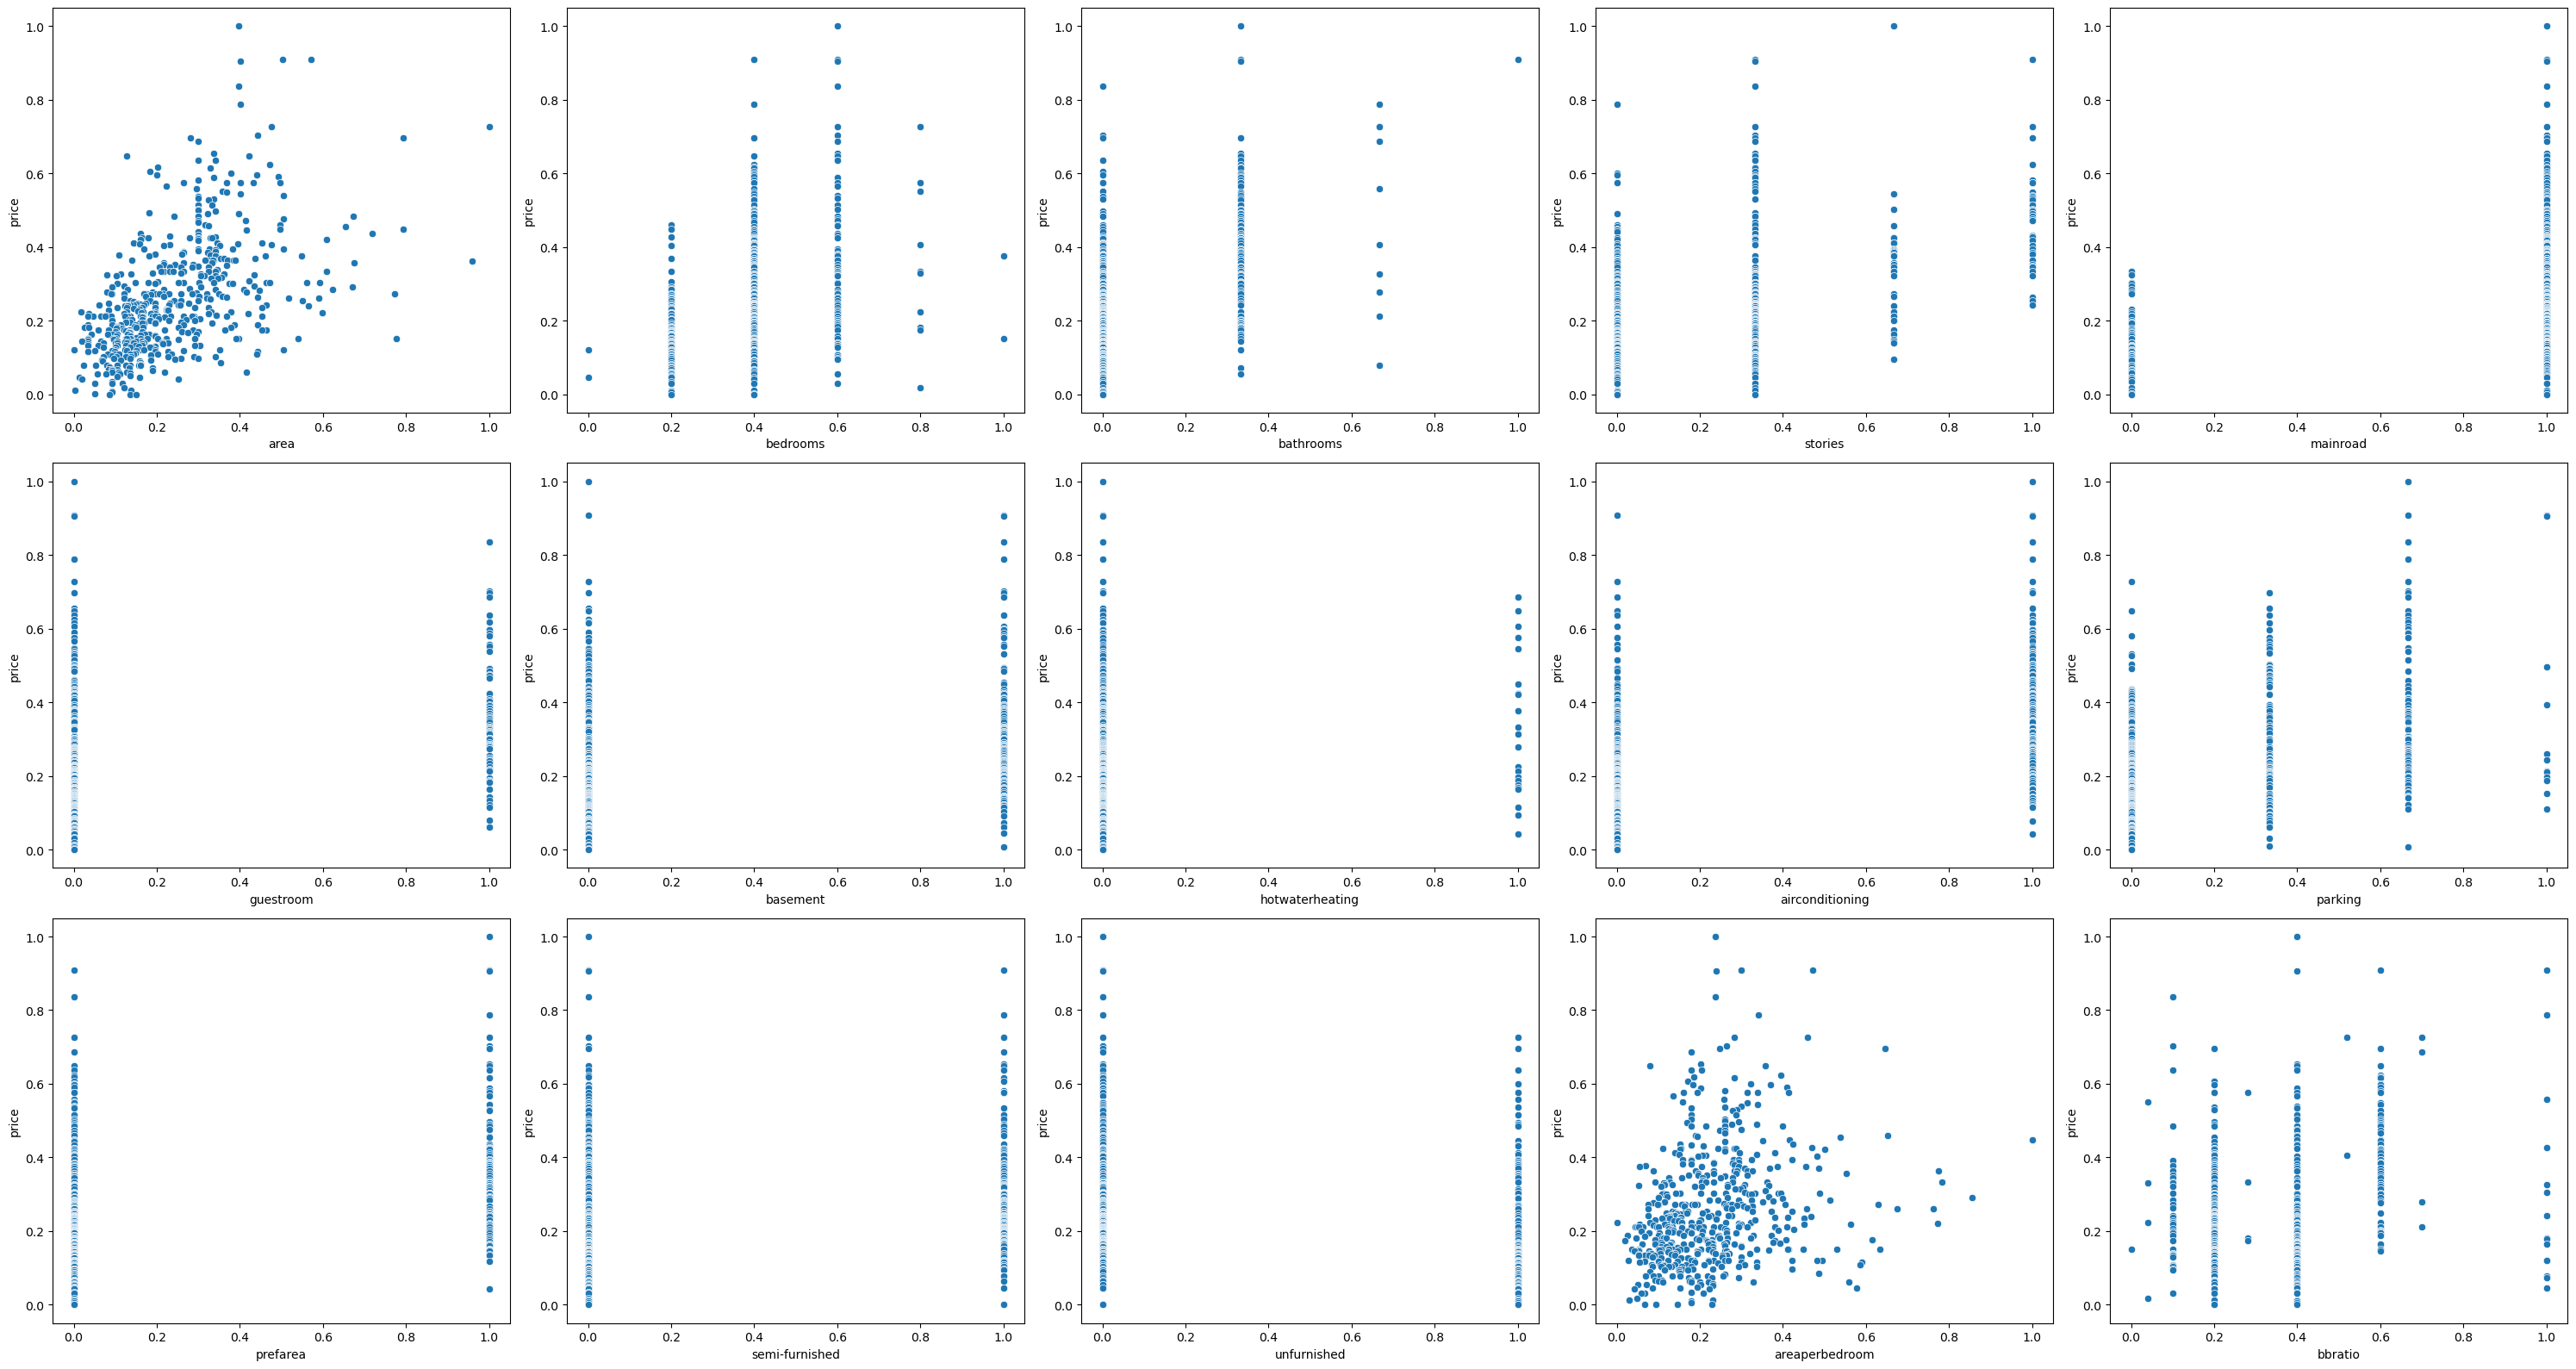

In [1945]:
fig,axes = plt.subplots(3,5,figsize=(30,16))
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()


axes = np.ravel(axes)

for i,j in zip(housing.columns[1:],axes):
    sns.scatterplot(x=housing[i],y=housing['price'],ax=j)
    
plt.tight_layout()

<Axes: >

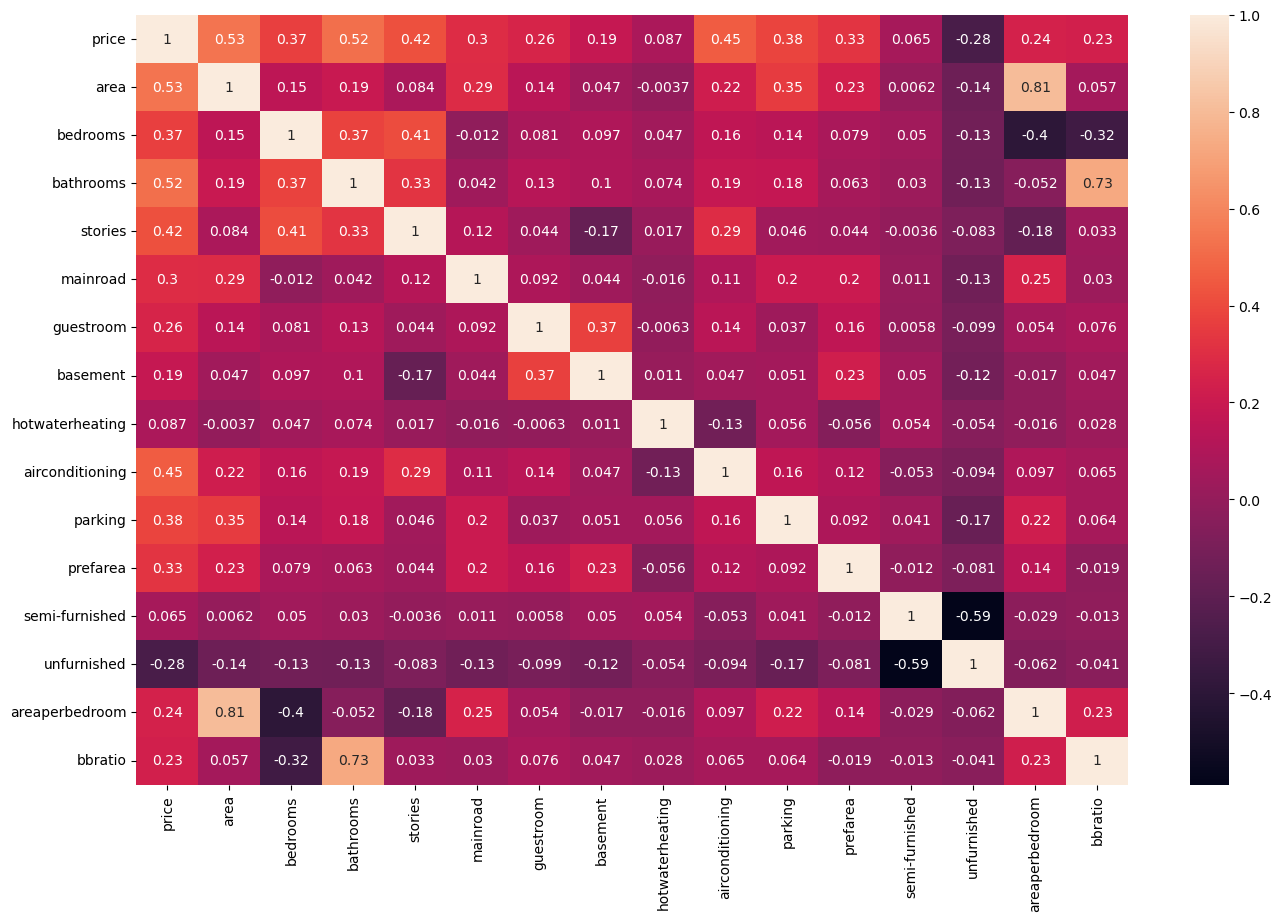

In [1946]:
plt.figure(figsize=(16,10))

sns.heatmap(housing.corr(),annot=True)


### 2. No Multicollinearity among features

<Axes: >

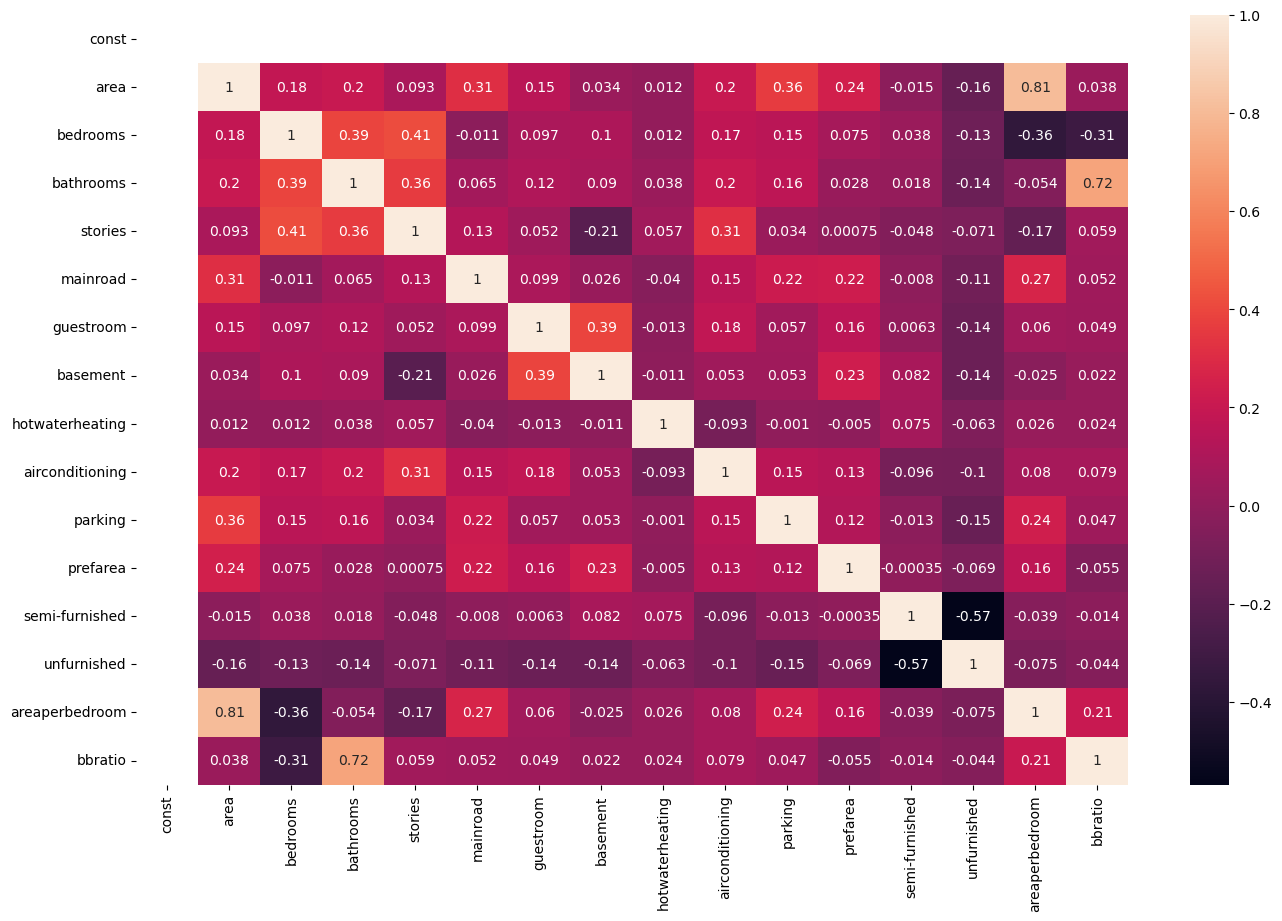

In [1947]:
plt.figure(figsize=(16,10))

sns.heatmap(x_train.corr(),annot=True)


## handling outliers

In [1969]:
housing['area'] = np.cbrt(housing['area'])

In [1975]:
Q1 = housing['area'].quantile(0.25)
Q3 = housing['area'].quantile(0.75)
IQR = Q3 - Q1             # interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_a = housing[(housing['area'] < lower_bound) | (housing['area'] > upper_bound)]
print(len(outliers_a))

5


## check correlation between independent features

### Checking VIF (Vriable Inflation Factor)

Multicollinearity can be detected via various methods. In this assignemnt, we will focus on the most common one – VIF (Variable Inflation Factors).<br>
VIF score of an independent variable represents how well the variable is explained by other independent variables.
1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

Lets define a function vif_scores that takes a dataframe with relevant input features and returns a dataframe with two columns
1. variables which  has feature name
2. VIF which has vif score for corresponding feature

Please do have patience to run this function again and again as you will be required to drop all the variables one by one with high vif (>5).

So lets impliment it.


#### Variance inflation factor

In [1951]:
# import variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Define vif_scores function as stated above
def vif_scores(input_data):
    # code here
    dic={}
    dic['columns']=input_data.columns
    dic['VIF']=[variance_inflation_factor(input_data.values,i) for i in range(len(input_data.columns))]
    return pd.DataFrame(dic)


# print vif scores for all current input features

vif_scores(x)


,columns,VIF
0,area,57.507520
1,bedrooms,10.685203
2,bathrooms,11.112353
3,stories,2.805309
4,mainroad,7.910505
5,guestroom,1.492430
6,basement,2.046283
7,hotwaterheating,1.092384
8,airconditioning,1.767052
9,parking,2.003485


### Dropping the Variable and Updating the Model

Dropping highly correlated variables and insignificant variables through both correlation matrix and vif scores.

As you can see there are two groups of multicollinear variables. 
1. areaperbedroom and area
2. bbratio and bathrooms

the first group is neccesary for us to keep as it gives us relevant impact on traget, but from second set as we know that bbratio is not as significant as bathrooms, so we will drop it off.

In [1952]:
# Lets check vif scores again after removing bbratio from features.
x.drop('bbratio',axis=1,inplace=True)

vif_scores(x)

,columns,VIF
0,area,20.711224
1,bedrooms,10.027763
2,bathrooms,1.713865
3,stories,2.782681
4,mainroad,7.460286
5,guestroom,1.478757
6,basement,2.028035
7,hotwaterheating,1.088210
8,airconditioning,1.766668
9,parking,1.999744


As you can see the vif scores are still high. Lets drop bedroom also as input feature and again check vif scores.

In [1953]:
# # Lets check vif scores after removing bedrooms from left features.
# x.drop('bedrooms',axis=1,inplace=True)

# vif_scores(x)



As you can see the vif scores are still high. Lets drop areaperbedroom which we calculated as input feature and again check vif scores.

Its very natural that both area, bedroom and areaperbedroom will be highly correlated with each other as areaperbedroom is calculated out of area and bedroom.



In [1954]:
# Lets check vif scores after removing areaperbedroom from features which are left.

x.drop("areaperbedroom",axis=1,inplace=True)
vif_scores(x)


,columns,VIF
0,area,4.642482
1,bedrooms,7.548525
2,bathrooms,1.686824
3,stories,2.747840
4,mainroad,5.911634
5,guestroom,1.475439
6,basement,2.014185
7,hotwaterheating,1.083632
8,airconditioning,1.761155
9,parking,1.995858


Now as you can still see vif scores are again more than 5. But if you see only 'mainroad' feature which having high vif score does'nt mean that you will remove it.
You need to see the importance of that particular feature also in price prediction. Since mainoad, area and stories are really important to us. So you can go with removing semi-furnished feature next.

In [1955]:
# # Lets check vif scores after removing semi-furnished from features which are left.
# x.drop('semi-furnished',axis=1,inplace=True)
# vif_scores(x)


still vif scores of some features are close to 5. Lets check which one we can drop off. If you see first five features are of importance but then least important among them would be basement.


In [1956]:
# # Lets check vif scores after removing basement from features which are left.

# x.drop('basement',axis=1,inplace=True)
# vif_scores(x)


Now we have vif scores less than 5 

So in total  we have removed 5 features namely "bedrooms","bbratio","areaperbedroom","semi-furnished" and "basement".


In [1972]:
# import test_train_split module
from sklearn.model_selection import train_test_split


# test and train split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


## model 2

In [1973]:
# Adding a constant column to our dataframe
x_train = sm.add_constant(x_train)
   


# Adding  constant variable to test dataframe
x_test = sm.add_constant(x_test)


# create a second fitted model
lm_2 = sm.OLS(y_train,x_train).fit()

In [1974]:
#print model 2 summary

lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     74.12
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          3.61e-100
Time:                        07:42:44   Log-Likelihood:                 436.84
No. Observations:                 436   AIC:                            -845.7
Df Residuals:                     422   BIC:                            -788.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0182      0.021      0.884      0.377      -0.022       0.059
area                0.3045      0.032      9.394      0.000       0.241       0.368
bedrooms            0.0438      0.035      1.238      0.216      -0.026       0.113
bathrooms           0.2523      0.029      8.777      0.000       0.196       0.309
stories             0.1190      0.018      6.587      0.000       0.084       0.155
mainroad            0.0386      0.013      2.871      0.004       0.012       0.065
guestroom           0.0254      0.013      2.017      0.044       0.001       0.050
basement            0.0257      0.010      2.453      0.015       0.005       0.046
hotwaterheating     0.0814      0.021      3.861      0.000       0.040       0.123
airconditioning     0.0772      0.010      7.575      0.000       0.057       0.097
parking             0.0678      0.017      4.050      0.000       0.035       0.101
prefarea            0.0531      0.011      4.886      0.000       0.032       0.074
semi-furnished      0.0043      0.011      0.385      0.701      -0.018       0.026
unfurnished        -0.0327      0.012     -2.683      0.008      -0.057      -0.009
==============================================================================
Omnibus:                       53.720   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.317
Skew:                           0.671   Prob(JB):                     9.10e-26
Kurtosis:                       5.132   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1978]:
# Making predictions
y_pred = lm_2.predict(x_test)
y_pred.shape

(109,)

# accuracy

## Model Evaluation

<p style='text-align: right;'> 8 points</p>
 


The skill or performance of a regression model must be reported as an error in those predictions.
You don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values.

Error addresses exactly this and summarizes on average how close predictions were to their expected values.


<Axes: ylabel='price'>

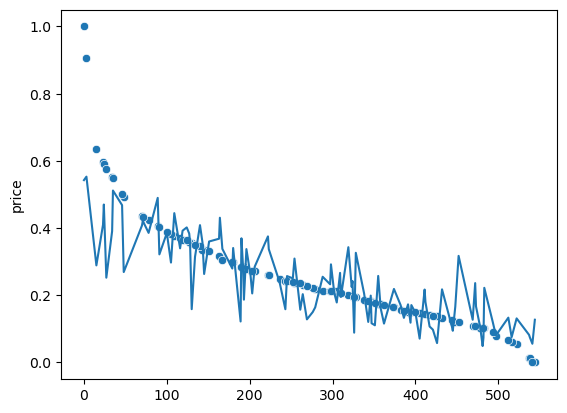

In [1982]:
#Actual vs Predicted graph as below

sns.scatterplot(x =y_test.index,y=y_test)
sns.lineplot(x =y_pred.index,y=y_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


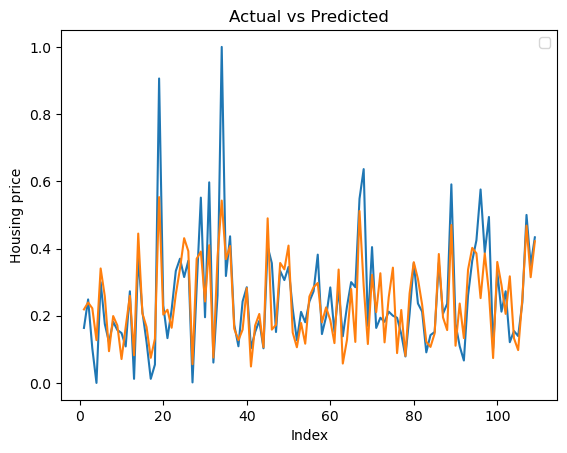

In [1983]:
# Actual vs Predicted graph as below
c = [i for i in range(1,110,1)]
fig = plt.figure()

#Plotting Actual
plt.plot(c,y_test)

 

#Plotting predicted
plt.plot(c,y_pred)

 # Plot heading 
plt.title('Actual vs Predicted')

# X-label
plt.xlabel('Index')
           
# Y-label                  
plt.ylabel('Housing price')
plt.legend()
plt.show()#showing the plot

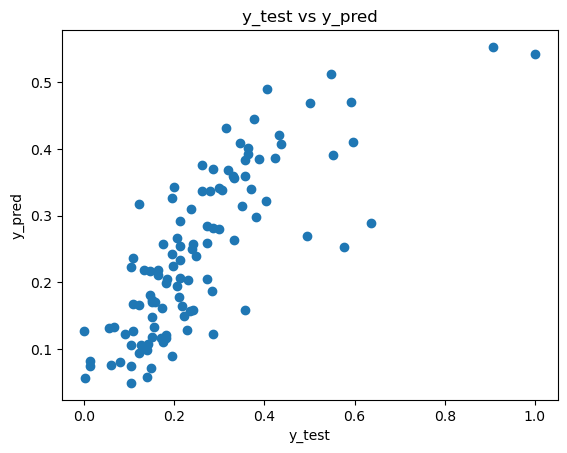

In [1984]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
plt.scatter(x=y_test,y=y_pred)

# Plot heading 
plt.title('y_test vs y_pred')

# X-label
plt.xlabel('y_test')   

# Y-label
plt.ylabel('y_pred')                
plt.show()

In [1985]:
residuals = y_test - y_pred

In [1986]:
# plt.scatter(range(109),residuals)


# # Plot heading 
# plt.title('y_test vs y_pred')

# # X-label
# plt.xlabel('y_test')   

# # Y-label
# plt.ylabel('y_pred')                
# plt.show()

## 3 Normality of Residual  N(0,sigma^2)

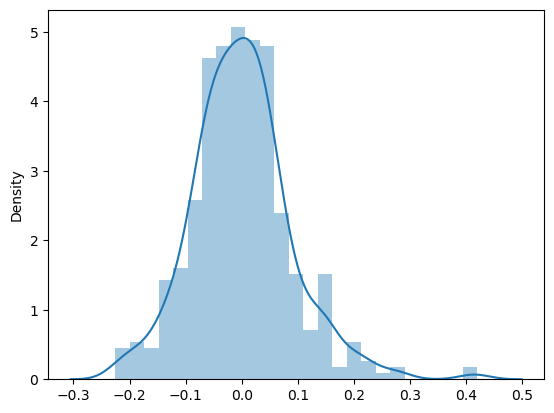

In [1987]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()

sns.distplot(lm_2.resid)
plt.show()


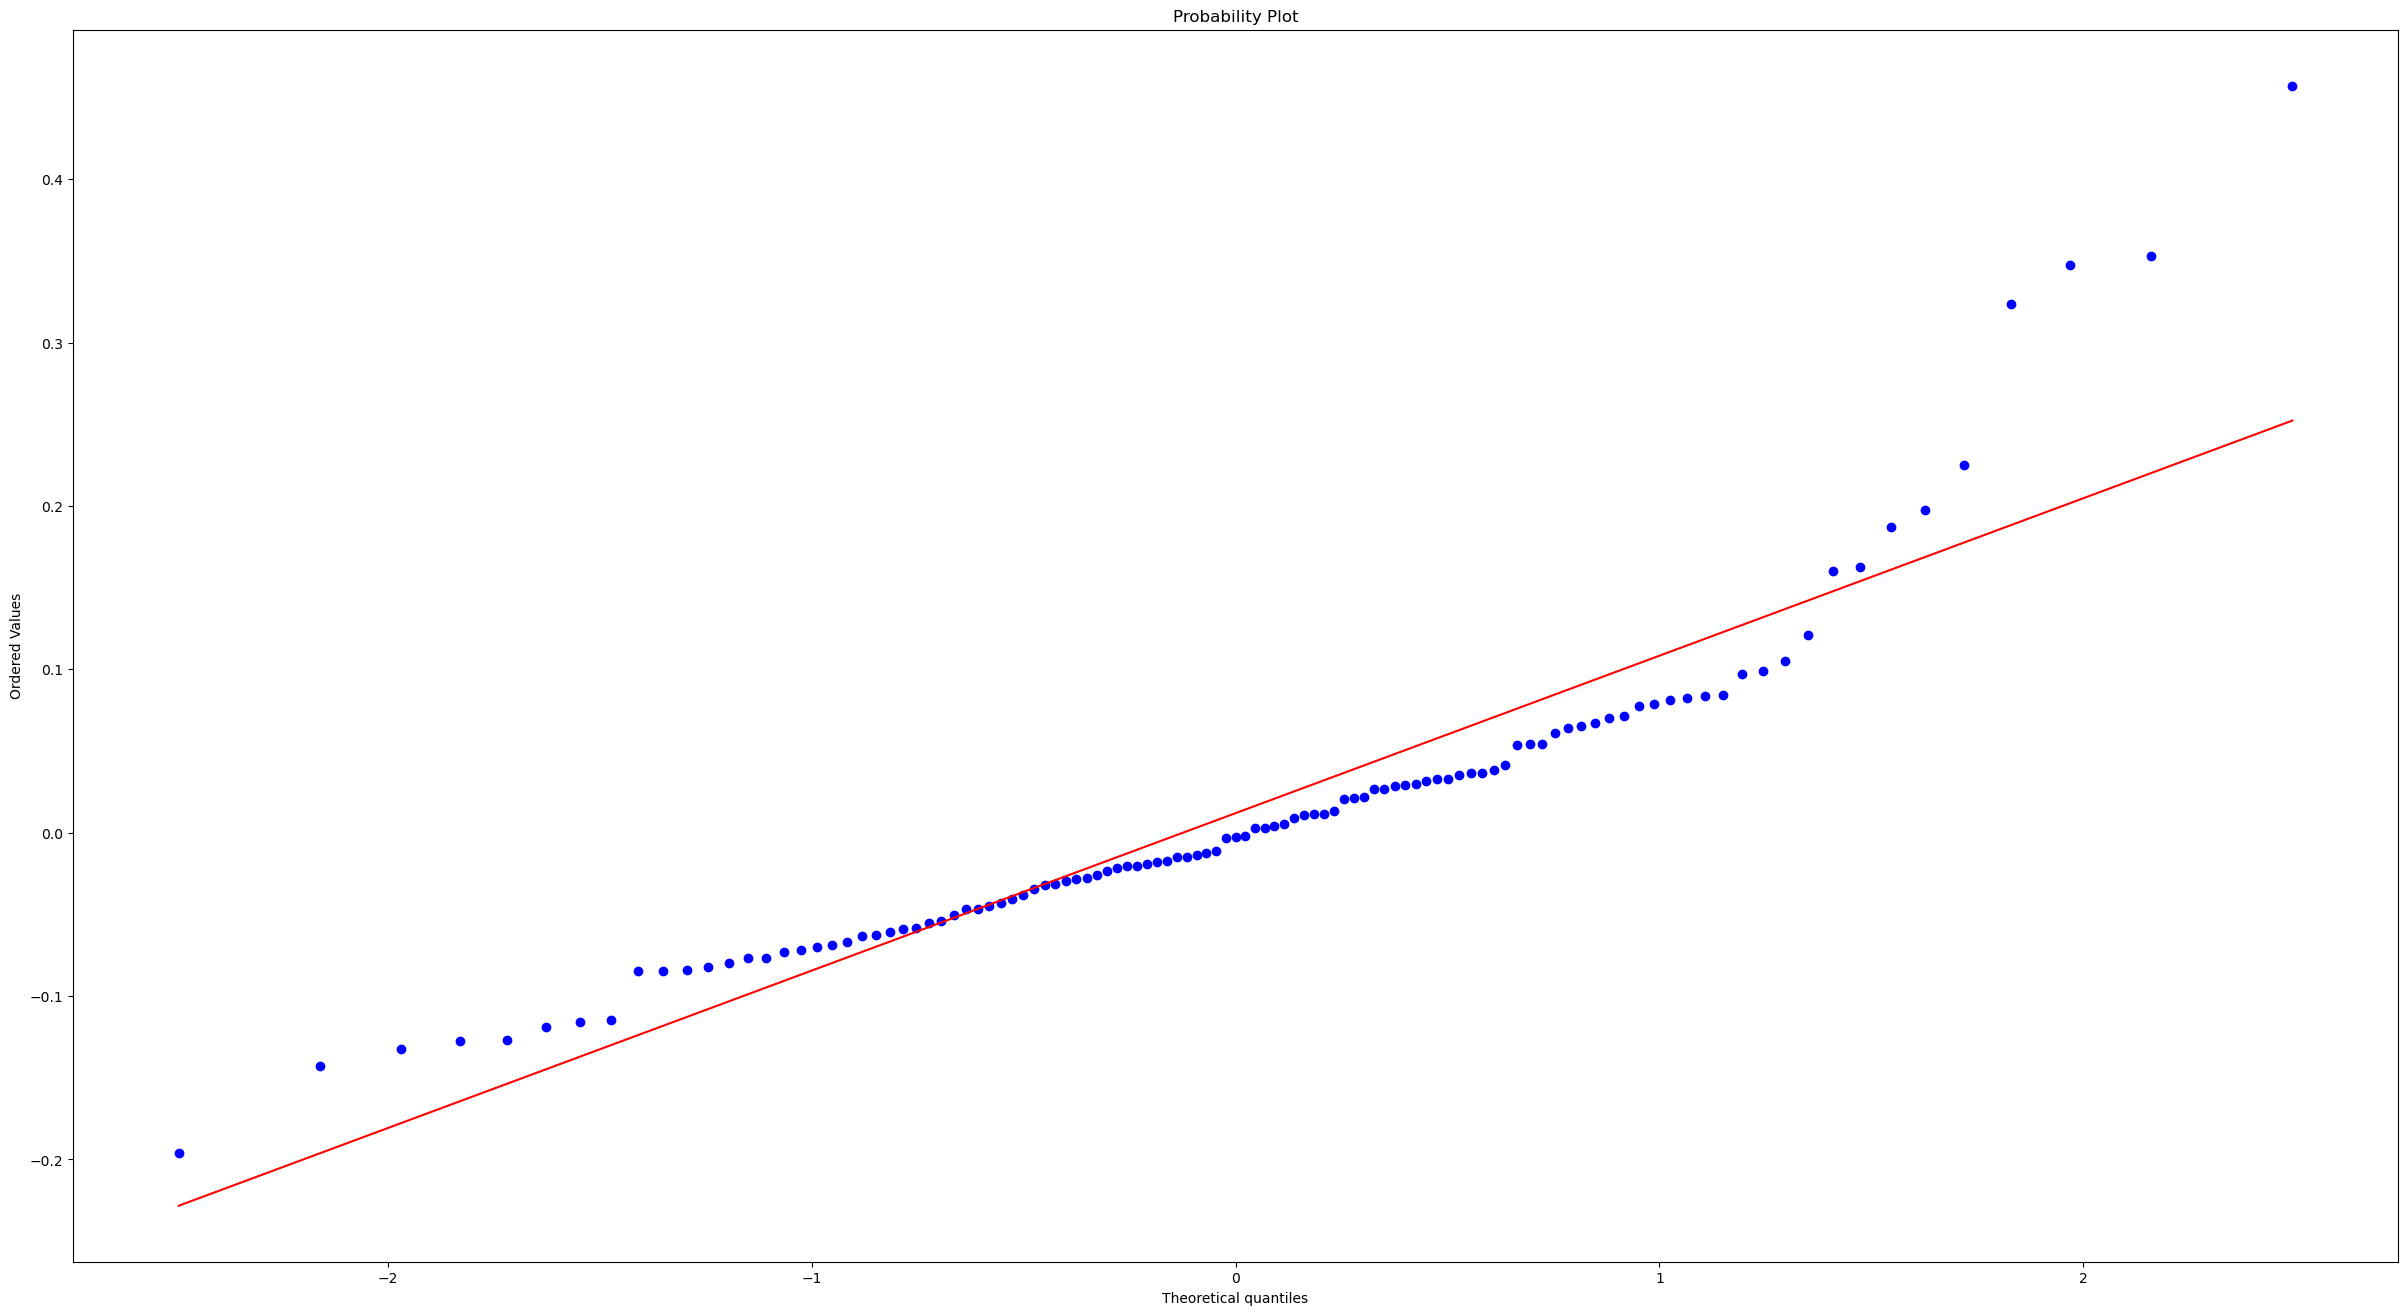

In [1995]:
# QQ plot 

import scipy as sp 
fig,axes = plt.subplots(figsize=(30,16))

sp.stats.probplot(residuals,plot=axes,fit=True)
plt.show()

## 4 Homoscedasitcity

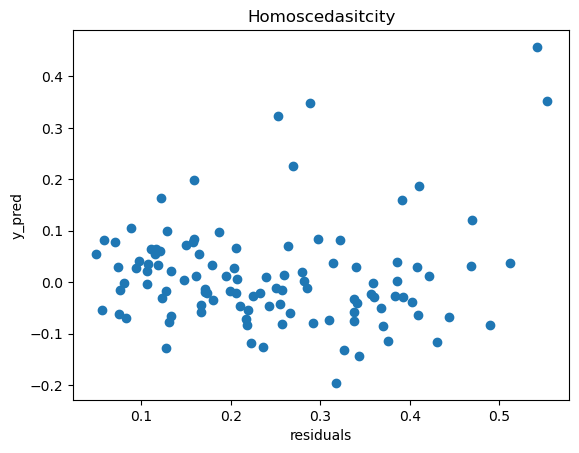

In [1996]:
plt.scatter(x=y_pred,y=residuals)


# Plot heading 
plt.title('Homoscedasitcity')
# X-label
plt.xlabel('residuals')   

# Y-label
plt.ylabel('y_pred')                
plt.show()

## 5 No Auto Correlation of Error

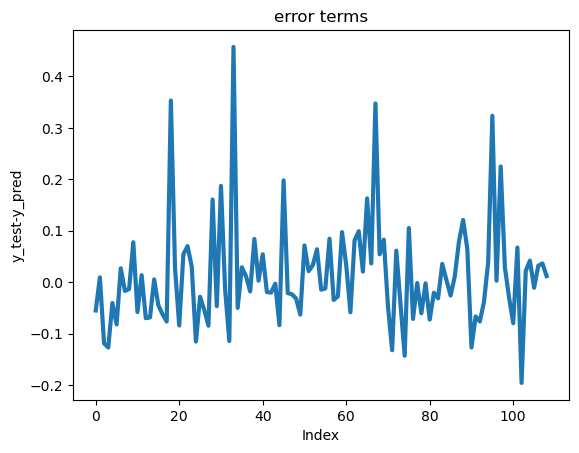

In [1998]:
# Plotting line chart of Error terms
residuals = y_test-y_pred
fig = plt.figure()
plt.plot(list(range(109)),residuals,linewidth=3)

 # Plot heading
plt.title('error terms')

# X-label
plt.xlabel('Index')

# Y-label
plt.ylabel("y_test-y_pred")
               
plt.show()

it show negative autocorrelation between residuals

In [1999]:
#import metrics module
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error as mae




#calculate and print RMSE
print("RMSE value is %.3f"%np.sqrt(mse(y_test,y_pred)))

#calculate and print MSE
print('MSE value is %.3f'%mse(y_test,y_pred))

#calculate and print MAE

print('Mae value is %.3f'%mae(y_test,y_pred))

RMSE value is 0.102
MSE value is 0.010
Mae value is 0.070


In [2026]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [2027]:
# Initializing linearRegression function 
lm = LinearRegression()


# Iitialising RFE using above model
rfe = RFE(lm)
       

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(x_train,y_train)


# Printing the boolean results for each features

print(rfe.get_support())

# Printing the ranks for each features
print(rfe.ranking_)

[False  True False  True  True False False False  True  True  True  True
 False False]
[8 1 2 1 1 3 6 5 1 1 1 1 7 4]


In [2028]:
#Print the total no. of features in X
print(len((x.columns)))


#Get columns which are supported by RFE
col = x_train.columns[rfe.support_]


# print col
print(col)

13
Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')


As you can see that 6 features got selected out of initial 11 features.

## Visualising Data

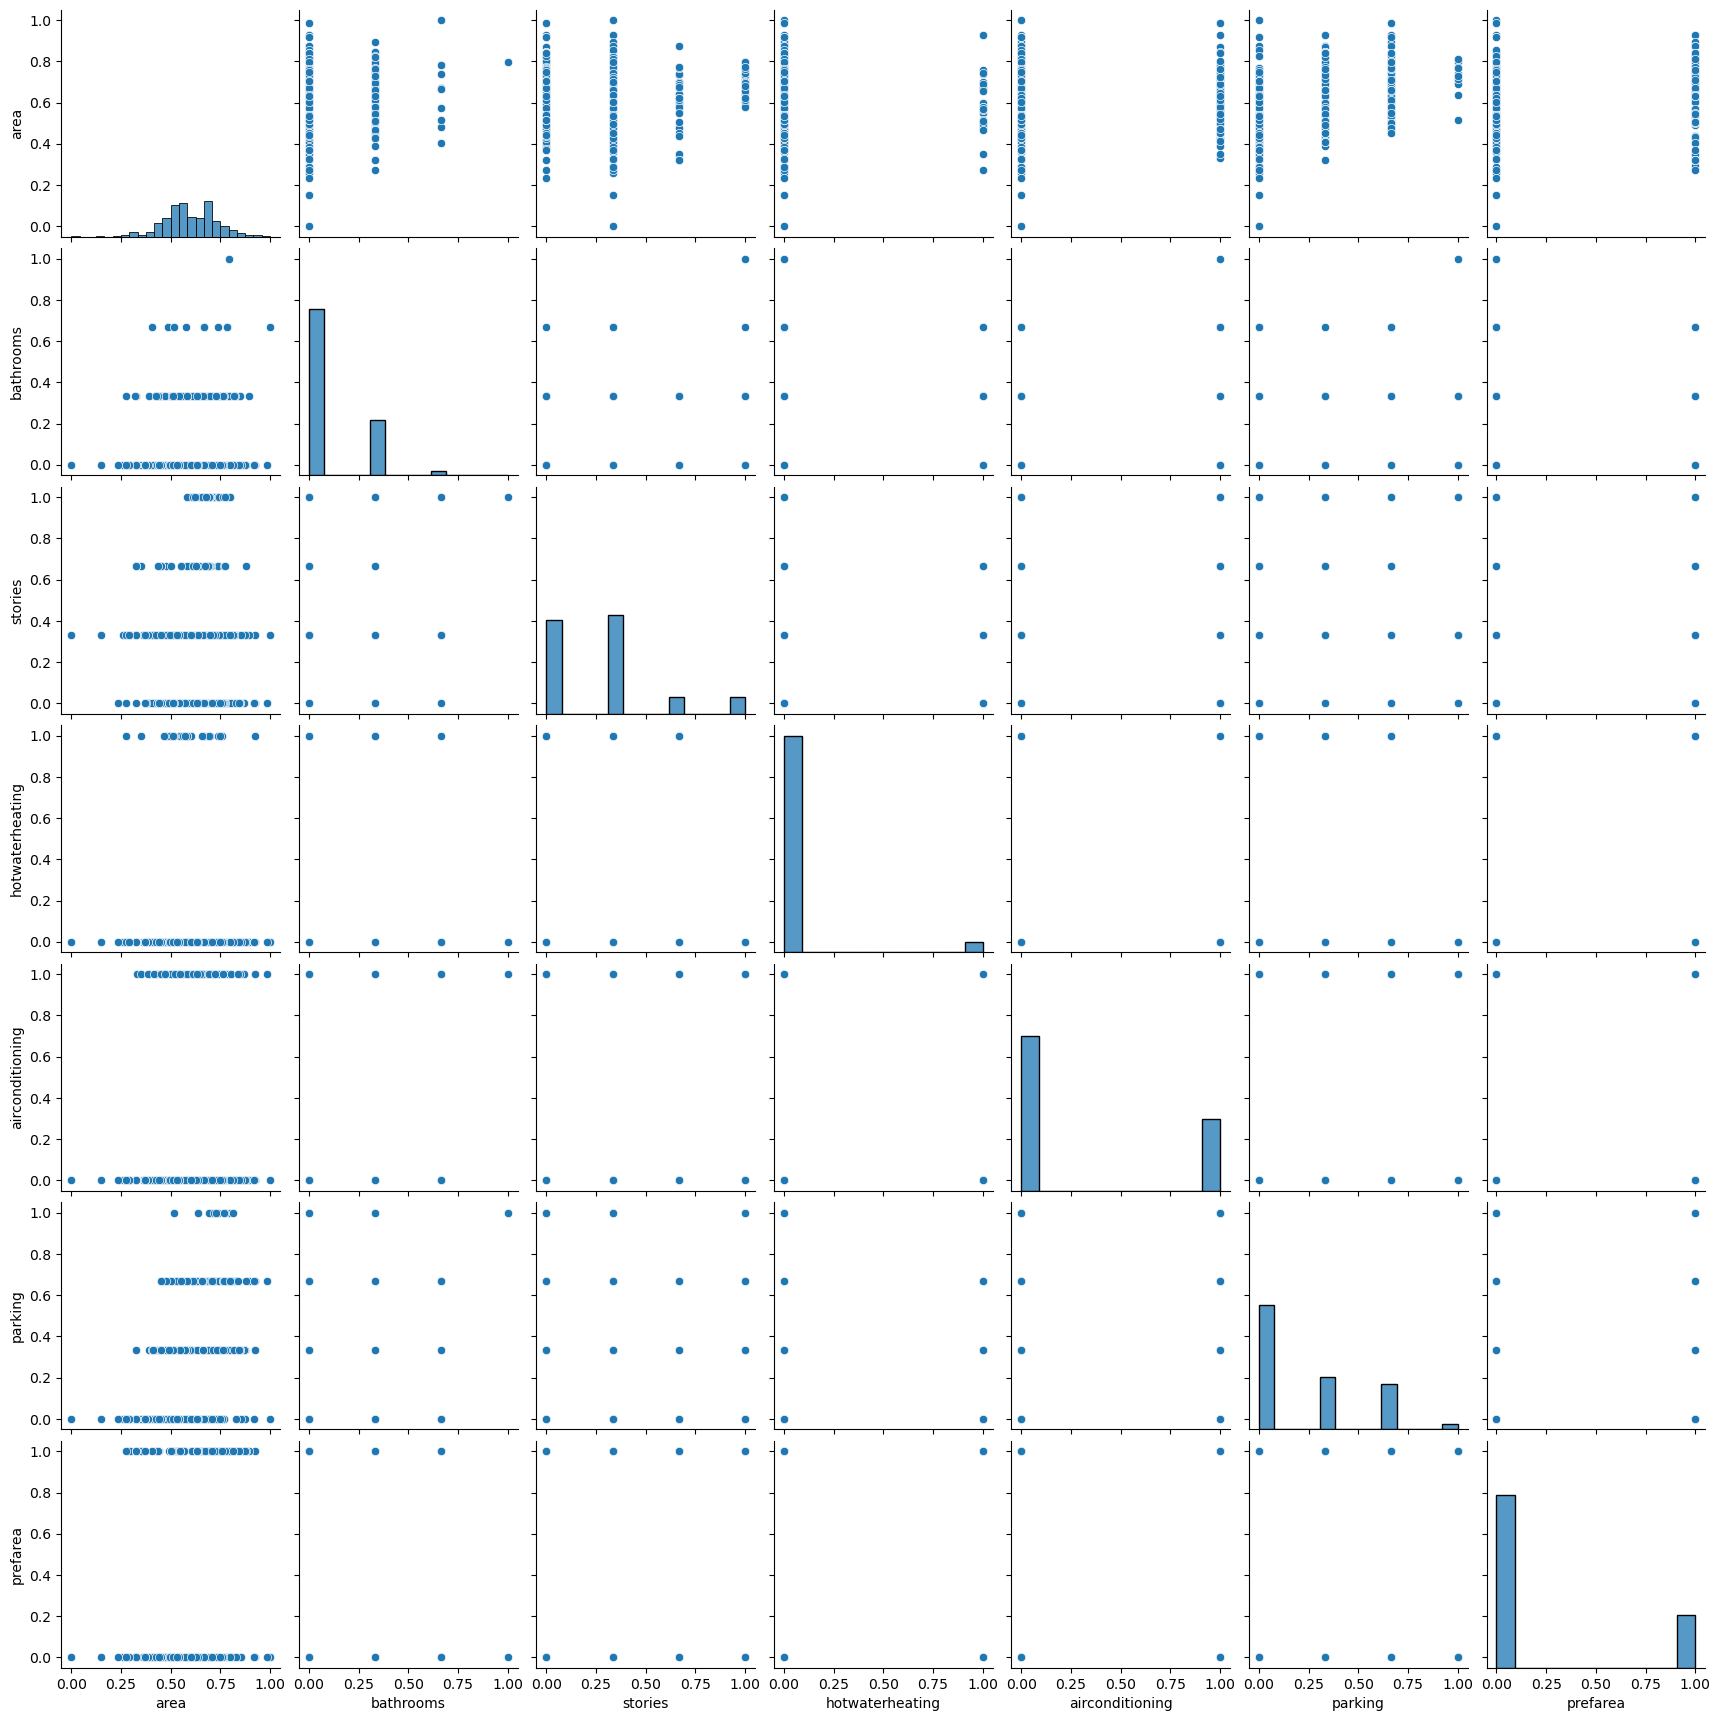

In [2029]:
# Let's plot a pair plot of all RFE selected variables in housing dataframe
sns.pairplot(housing[col])


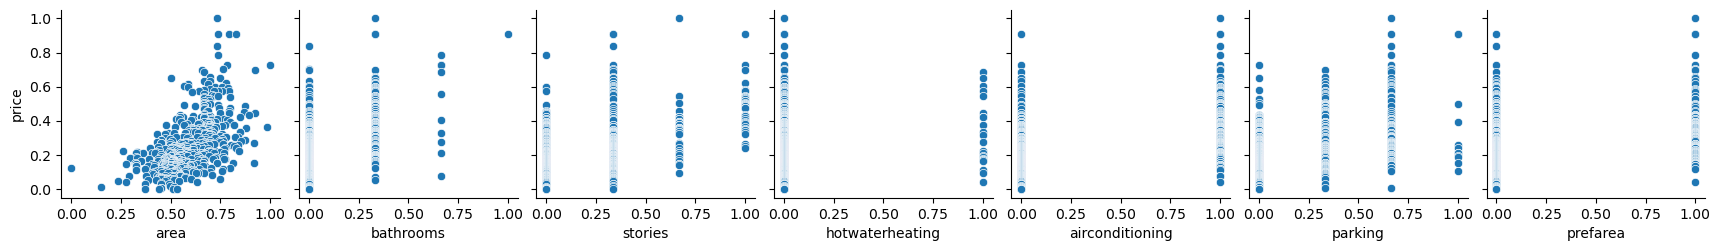

In [2030]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing,x_vars=col,y_vars='price')

So above you can see that the relationship between target and features shows some constant relation.



## Building model again with above selected features.

In [2031]:
# Creating X_train dataframe with RFE selected variables
x_train_rfe = x_train[col]


In [2032]:
# Adding a constant variable in X_train_rfe
x_train_rfe = sm.add_constant(x_train_rfe)


In [2033]:
# fitting your third linear model with y_train and X_train_rfe
lm_3 = sm.OLS(y_train,x_train_rfe).fit()
  

In [2034]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     119.4
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.80e-96
Time:                        08:07:23   Log-Likelihood:                 413.68
No. Observations:                 436   AIC:                            -811.4
Df Residuals:                     428   BIC:                            -778.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0525      0.009     

In [2008]:
# Calculating Vif scores on housing data with selected columns by RFE

vif_scores(housing[col])

,columns,VIF
0,area,3.235645
1,bathrooms,1.555913
2,stories,2.185569
3,hotwaterheating,1.079638
4,airconditioning,1.733960
5,parking,1.882242
6,prefarea,1.368926


In [2009]:
# Creating X_test dataframe with RFE selected variables
x_test_rfe = x_test[col]


# Adding a constant variable to X_test_rfe
x_test_rfe = sm.add_constant(x_test_rfe)


# Making predictions
y_pred = lm_3.predict(x_test_rfe)


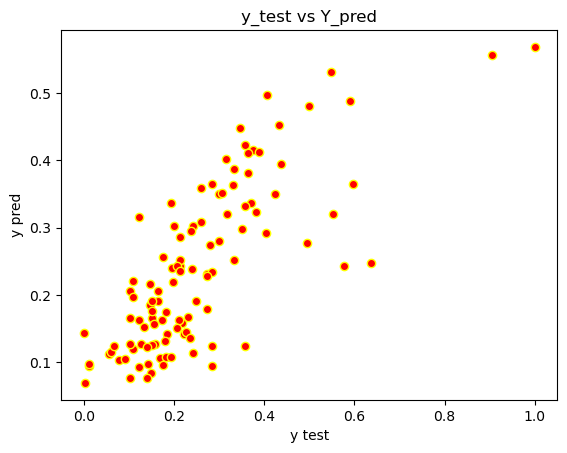

In [2010]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='red',edgecolor='yellow')
plt.xlabel('y test')
plt.ylabel("y pred")
plt.title("y_test vs Y_pred")

plt.show()

In [2011]:
# Print RMSE, MSE and MAE scores for your third model
print("RMSE : %f"%np.sqrt(mse(y_test,y_pred)))
print("MSE: %f"%mse(y_test,y_pred))
print("MAE: %f"%mae(y_test,y_pred))


RMSE : 0.107298
MSE: 0.011513
MAE: 0.074801


## Model Selection

<p style='text-align: right;'> 4 points</p>


Seeing the results we can see that there is not much change in  model performance compared to your second model.
Infact rmse score got increased. The reason could be that we might have removed a/some features which were of importance.

May be your linear model wants some other features also to explain your target variable. 

We want you to underatand summary of all three models together

In [2012]:
#print summary of all 3 built models
print(lm_1.summary())
print(lm_2.summary())
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     61.22
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.33e-95
Time:                        07:59:25   Log-Likelihood:                 435.41
No. Observations:                 436   AIC:                            -838.8
Df Residuals:                     420   BIC:                            -773.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0619      0.057     

In [1071]:
x_test.columns

Index(['const', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'hotwaterheating', 'airconditioning', 'parking',
       'prefarea', 'unfurnished'],
      dtype='object')